# A statistical perspective on inverse problems

In this chapter we present a statistical perspective on inverse problems. This viewpoint allows us to incorporate prior assumptions and formulate variational problems. To avoid unnecessary technicalities, we'll stick to the finite-dimensional setting. A formal treatment in the infinite-dimensional setting is given in {cite}`Dashti2017`.

## Formulating prior assumptions

We take the viewpoint that both $f^{\delta}$ and $u$ are [continuous random variables](https://en.wikipedia.org/wiki/Random_variable). The prior assumptions are then formulated in terms of multi-variate [probability distributions](https://en.wikipedia.org/wiki/Probability_density_function).  

```{admonition} Definition: *Likelihood*
:class: important
The [likelihood function](https://en.wikipedia.org/wiki/Likelihood_function) models the probability of measuring $f^\delta$ given $u$. The corresponding probability density function is denoted by

$$\pi_{\text{data}}(f^\delta | u)$$
```

```{admonition} Definition: *Prior distribution*
:class: important
The [prior distribution](https://en.wikipedia.org/wiki/Prior_probability) models the probability of a particular $u$ being the underlying ground truth. It is denoted by

$$\pi_{\text{prior}}(u).$$
```

We can use [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) to combine the likelihood and prior to the [posterior distribution](https://en.wikipedia.org/wiki/Posterior_probability):

```{admonition} Definition: *Posterior distribution*
:class: important
The posterior distribution gives the probability of any given $u$ given the measurements $f^\delta$:

$$
\pi_{\text{post}}(u | f^\delta) = C\cdot  \pi_{\text{data}}(f^\delta | u) \pi_{\text{prior}}(u),
$$

where $C$ is the normalising constant needed to make $\pi_{\text{post}}$ integrate to 1.
```

````{admonition} Example: *Estimating the density of a rock sample*
Say we want to estimate the density of a given rock sample. To do this we measure the weight $w$ and volume $v$ of the rock. These are related to the (bulk) density as $\rho = w/v$ [g/cm^3]. Assuming that both measurements can be done independently with the same accuracy we have $w^\delta = w + \epsilon_{w}$ and $v^\delta = v + \epsilon_{v}$. We assume that $\epsilon_w,\epsilon_v$ are normally distributed with mean zero and variance $\sigma^2$. We then find the following relation between the density, the measurements and the error

$$w^\delta - \rho v^\delta = \epsilon_w - \rho \epsilon_v.$$

Thus, $w^\delta - \rho v^\delta$ is a normally distributed random variable with mean zero and variance $\sigma^2(1 + \rho^2)$. For $u = \rho$, this gives us the following Likelihood

$$\pi_{\text{data}}(f^\delta | u) = \frac{1}{\sigma\sqrt{1+\rho^2}\sqrt{2\pi}}\exp\left(-\frac{(w^\delta - \rho v^\delta)^2}{2\sigma^2(1+\rho^2)}\right).$$

As prior, we can use statistics of rock samples {cite}`johnson1984density`. This gives a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution) with parameters $(1.5,0.4)$. The corresponding distributions are shown in figure {numref}`rock_samples`.

```{glue:figure} rock_samples
:figwidth: 500px
:name: "rock_samples"

Example of probability densities with $w = 2$, $v=1$, $\sigma = 0.1$.
```
````

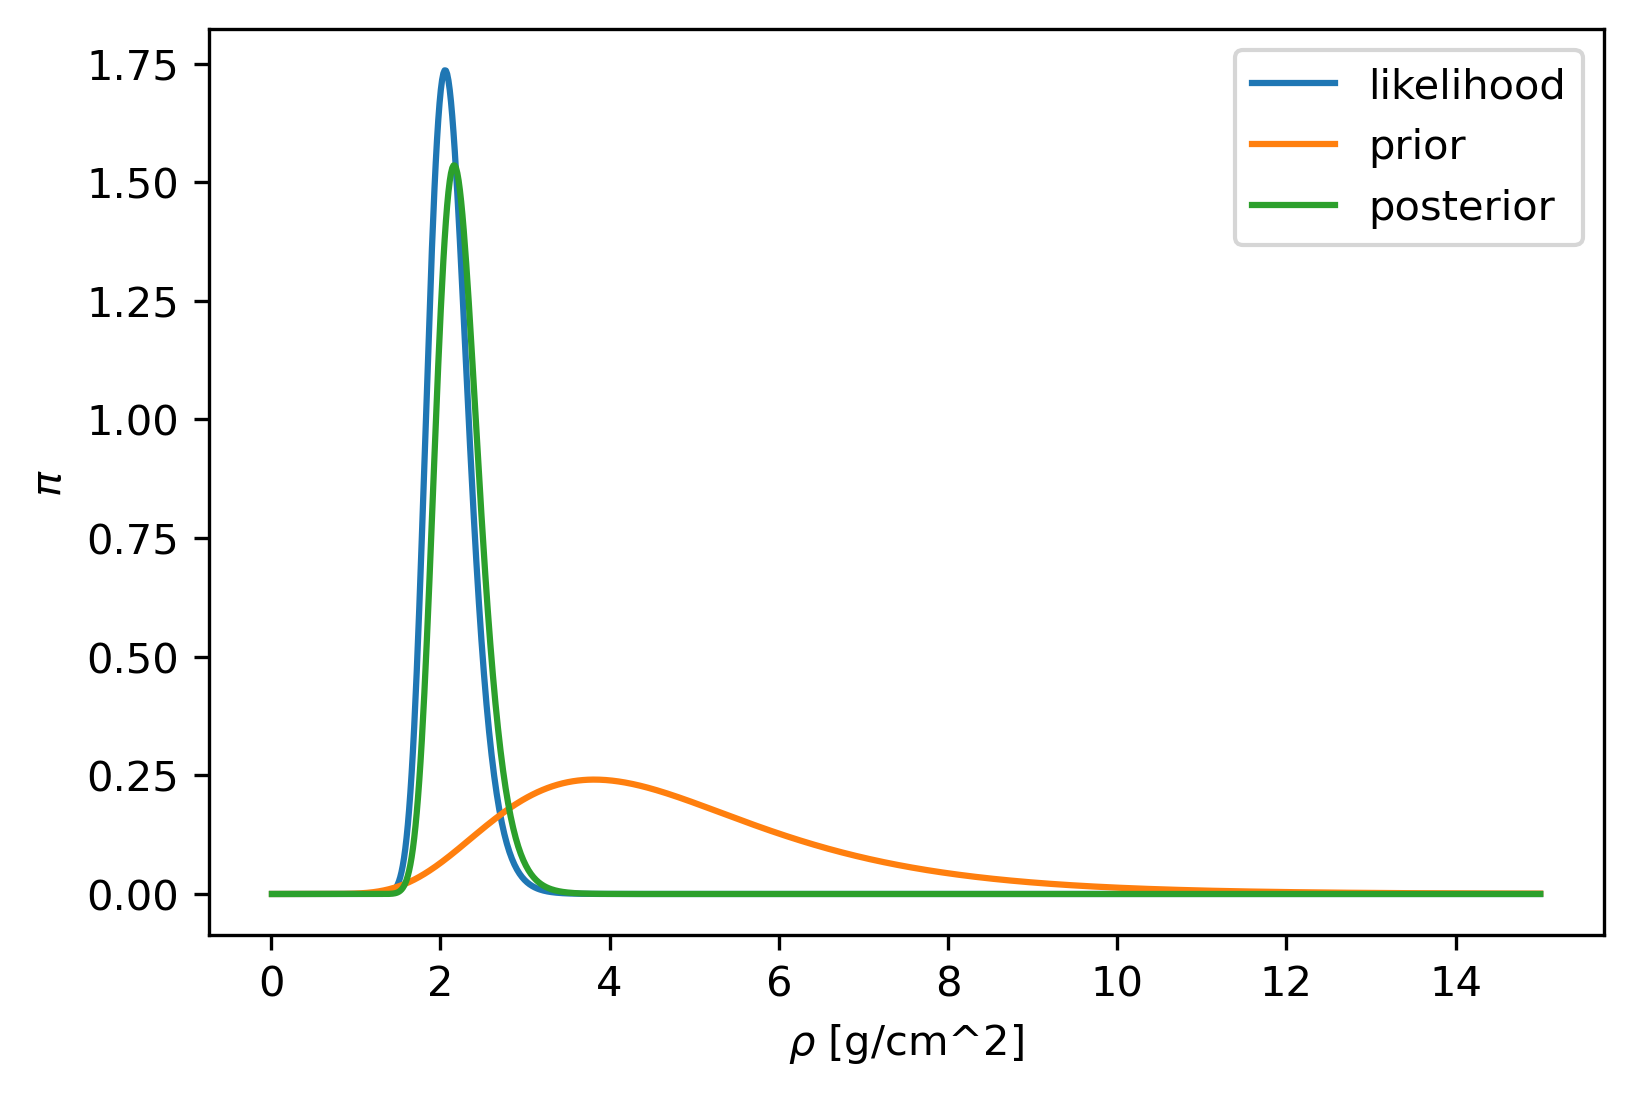

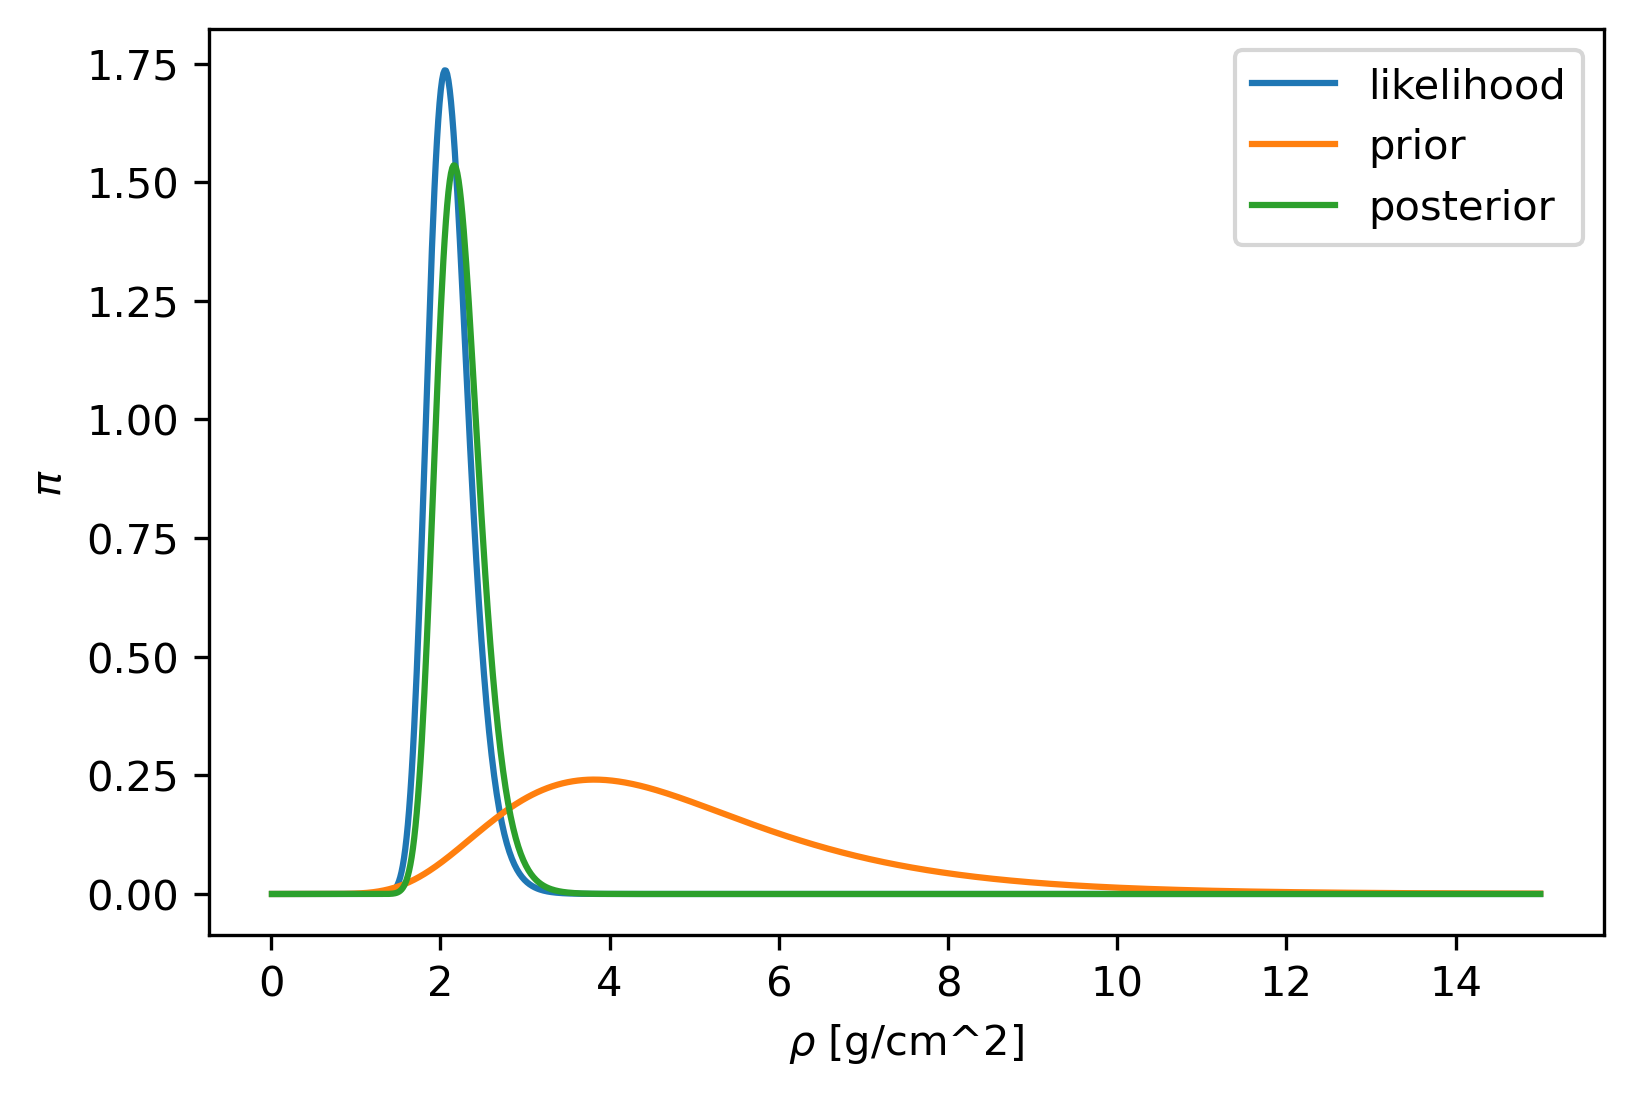

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from myst_nb import glue

# parameters
mu_prior = 1.5
sigma_prior = 0.4
sigma = 1e-1

# data
w = 2
v = 1
w_delta = w + np.random.normal(0,sigma)
v_delta = v + np.random.normal(0,sigma)

#
rho = np.linspace(0.01,15,1000)

likelihood = np.exp(-(w_delta - rho*v_delta)**2/(2*(1+rho**2)*sigma**2))/(sigma*np.sqrt(1+rho**2)*np.sqrt(2*np.pi))
prior = np.exp(-(np.log(rho)-mu_prior)**2/(2*sigma_prior**2))/(rho*sigma_prior*np.sqrt(2*np.pi))

# plot
fig,ax = plt.subplots(1,1)

ax.plot(rho,likelihood,label='likelihood')
ax.plot(rho,prior,label='prior')
ax.plot(rho,likelihood*prior/np.sum(likelihood*prior)*np.sum(prior),label='posterior')
ax.set_xlabel(r'$\rho$ [g/cm^2]')
ax.set_ylabel(r'$\pi$')
ax.legend()
glue("rock_samples", fig, display=False)

In a way, $\pi_{\text{post}}(u | f^\delta)$ is the answer to our inverse problem. It gives us information on the likelihood of any particular $u$ *under the assumptions* we made on $f^\delta$ and $u$. In some cases, we may be able to express the mean and variance of the resulting posterior density and use those. In many cases, however, we cannot easily characterise the posterior PDF. We may, however, attempt estimate certain properties by drawing samples from the posterior distribution. Such samples can be generated for any distribution using a [Markov chain Monte Carlo (MCMC) algorithm](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo). This is not very attractive for high-dimensional problems, however. Further discussion of such algorithms is outside the scope of this lecture.

## MAP estimation

For high-dimensional problems it is common to instead find the most likely parameter value

$$
\max_{u} \pi_{\text{post}}(u|f^\delta).
$$

The $u$ that attains this maximum is called the *maximum a posteriori* (MAP) estimate. For some distributions, like the Gaussian, the MAP estimate coincides the mean. For skewed or multi-modal distributions, the MAP may not be very representative.

Finding the MAP estimate can be naturally cast as a minimisation problem

$$
\min_u -\log \pi_{\text{post}}(u|f^\delta).
$$

Analysing and solving such variational problems will be the subject of subsequent chapters.

## Uncertainty quantification

Aside from estimate the *mode* of the posterior through MAP estimation, it is often desirable to estimate uncertainties. In effect, this would allow us to put error bars on the estimated parameters and quantify dependencies between parameters. It should be noted that the posterior mean and variance are subject to the prior assumptions made on the noise and the ground truth. To usefully interpret the posterior covariance, these assumptions should be carefully checked. The following example illustrates this.

````{admonition} Example: *Gaussian uncertainty quantification*

Consider denoising a direct measurement of a smooth signal

$$f^\delta_i = u(x_i) + \epsilon_i,\quad i \in \{0,1,\ldots, n-1\},$$

where $\epsilon_i \sim N(0,\sigma^2)$ and $u(x_i) \sim N(0,\Sigma)$, With

$$\Sigma_{ij} = \exp\left(-\frac{|i-j|^2}{2L^{2}}\right).$$

We estimate $u$ by solving the following regularised least-squares problem:

$$\min_u \|u - f^\delta\|_2^2 + \alpha \|u\|_{\Sigma^{-1}}^2.$$

Here, $\alpha$ is an estimate of the variance of the noise, so ideally we have $\alpha \approx \sigma^{2}$. The corresponding posterior mean and covariance are given by

$$\mu_{\text{post}} = \left(\alpha I + \Sigma\right)^{-1}\Sigma f^\delta,$$

$$\Sigma_{\text{post}} = \alpha \left(\alpha I + \Sigma\right)^{-1}\Sigma.$$

When using $\mu_{\text{post}}$ as an estimate for $u$ we could interpret the diagonal elements of $\Sigma_{\text{post}}$ as variances (and hence their square-root as a standard deviation). However, we should note that this mainly gives information on the *sensitivity* of the estimate to noise, and not necessarily on the *error* between the estimate and the ground truth. Even then, we may grossly underestimate the uncertainty when $\alpha < \sigma^{2}$. One way to asses whether the assumptions are valid is to study the residuals $r_i = \mu_{\text{post}i} - f_i^\delta$. If the assumptions are valid, we expect these to be normally distributed mean zero and variance $\alpha$. Likewise, we can verify whether $\mu_{\text{post}}$ is normally distributed with mean zero and covariance $\Sigma$.

```{glue:figure} gaussian_example
:figwidth: 500px
:name: "gaussian_example"

An example with $n = 100$, $\sigma^2 = 1$, $L = 10^{-1}$ for various values of $\alpha$. The top row shows the ground truth, the estimated mean and variance. The bottom row shows the histogram of the residuals and a Normal distribution with variance $\alpha$. We can make the posterior variance arbitrarily small by taking a small value for $\alpha$. However, this is misleading at the actual reconstruction will be heavily dependent on the noise. We can judge the appropriateness of the assumptions by looking at the residuals, which should be normally distributed with variance $\alpha$. We see that only for $\alpha = 1$ the residuals have the appropriate distribution.
```
````

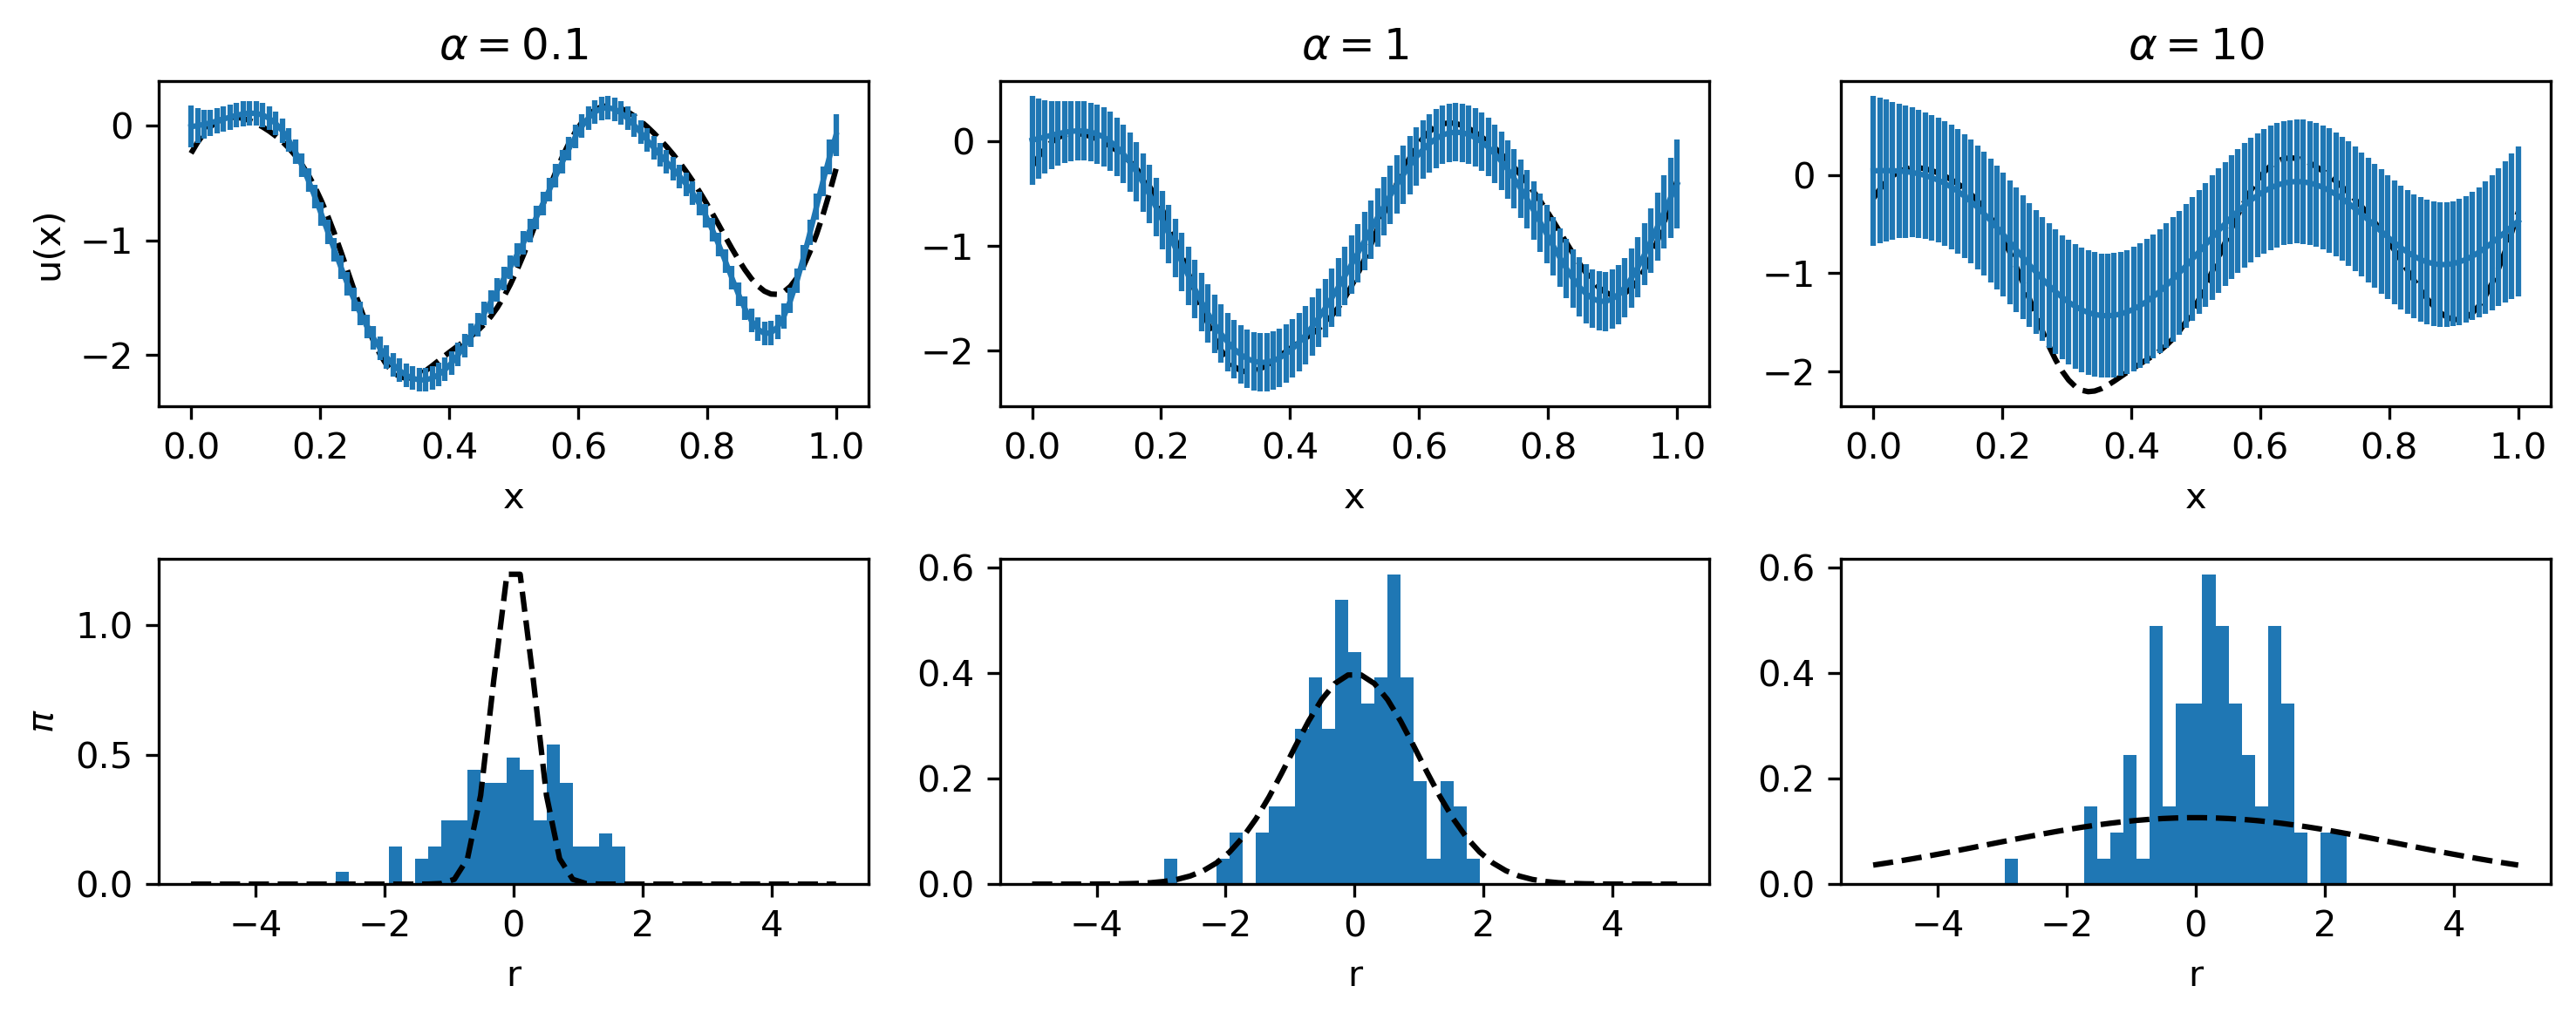

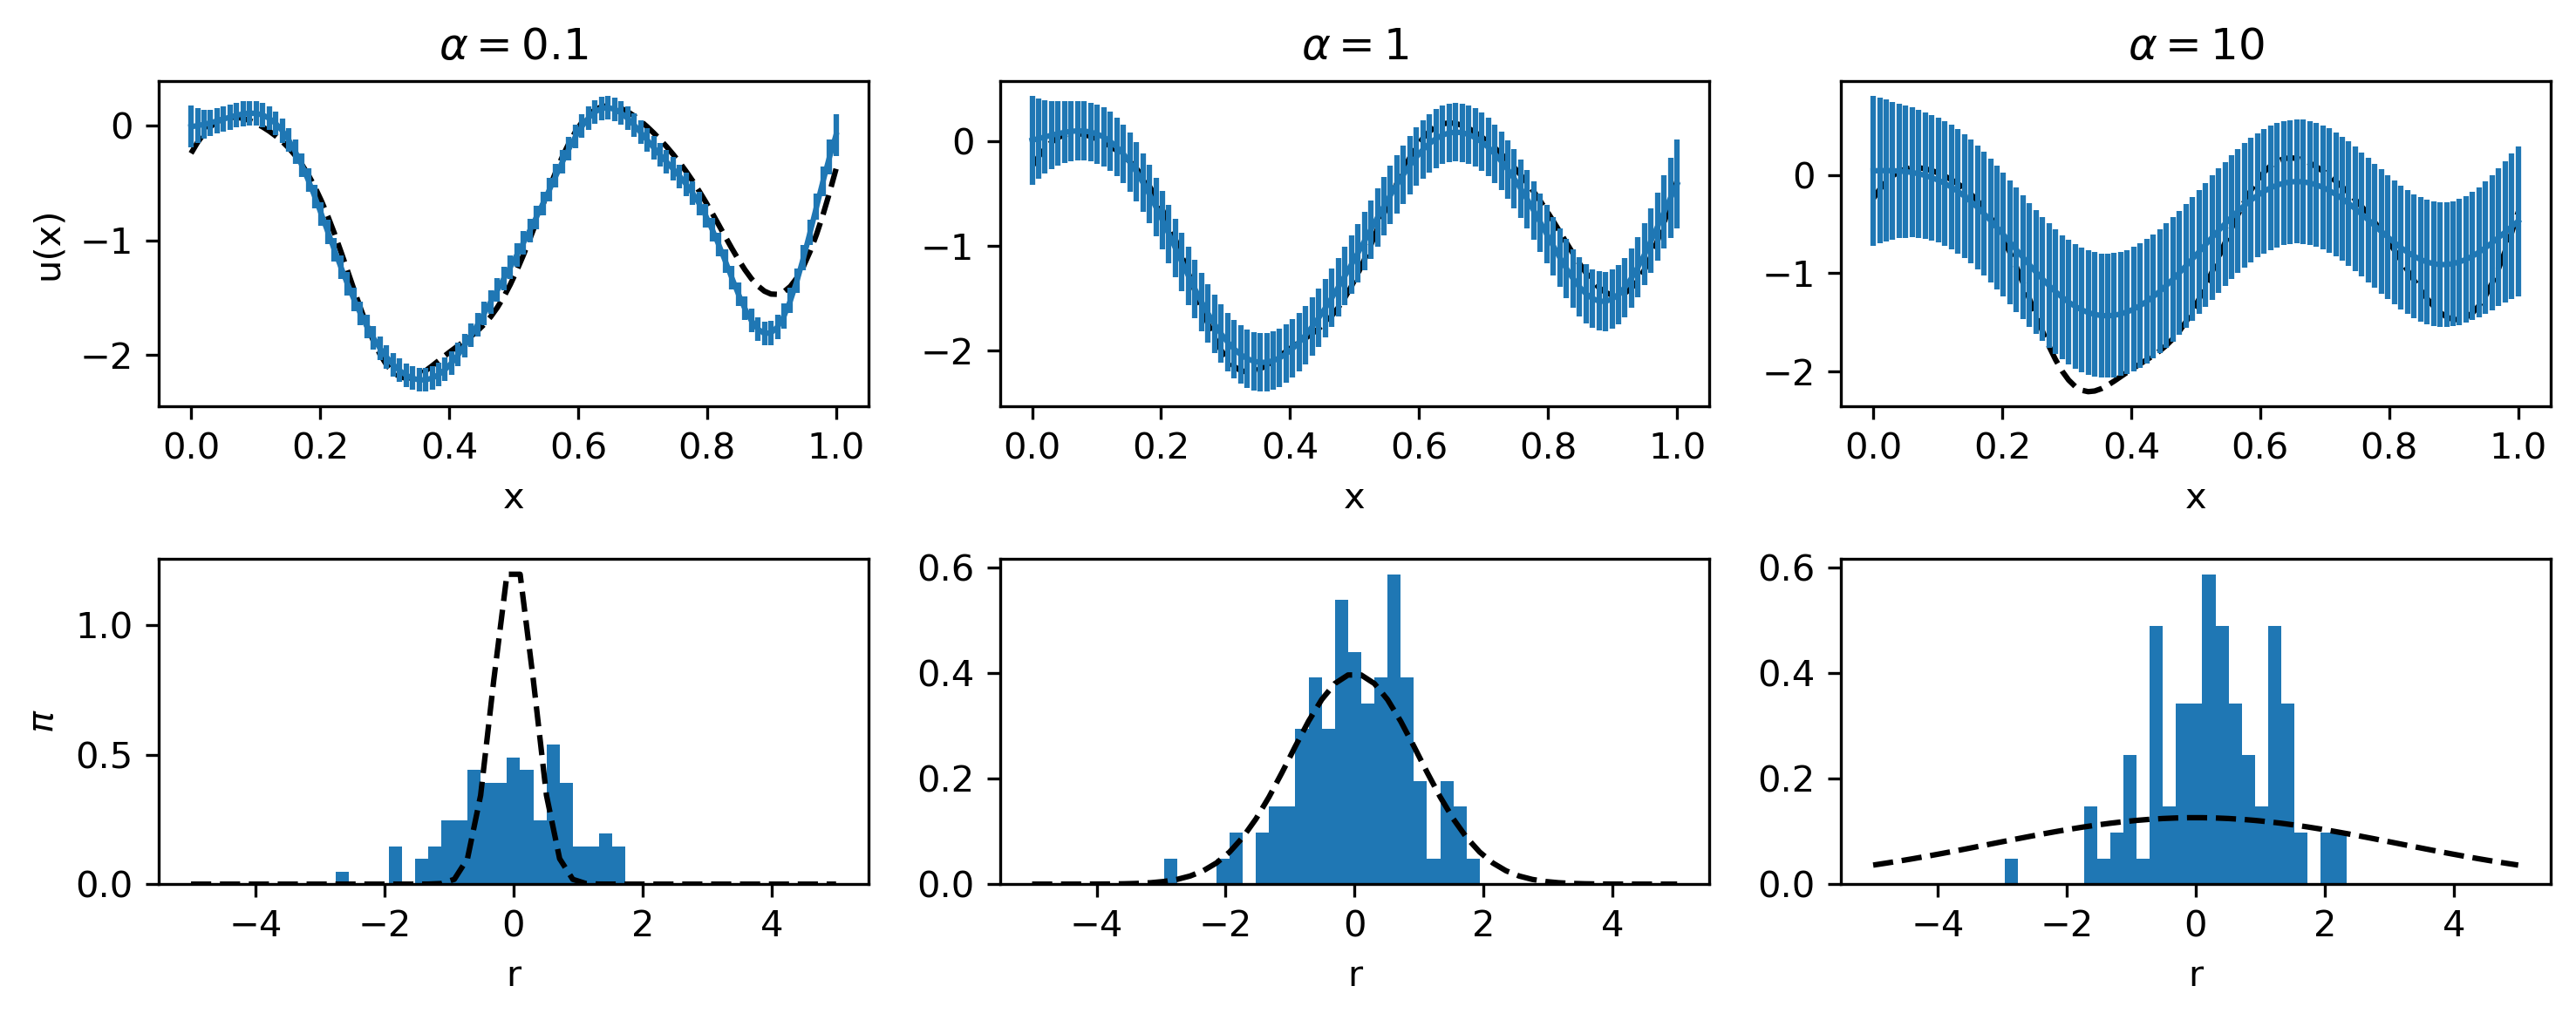

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from scipy.sparse import dia_matrix

# set random seed
np.random.seed(3)

# parameters
n = 100
sigma = 1
L = .1
alpha = [.1, 1, 10]

# grid
x = np.linspace(0,1,n)
x1,x2 = np.meshgrid(x,x)

# ground-truth and data
Sigma = np.exp(-np.abs(x1-x2)**2/(2*L**2))
u = np.random.multivariate_normal(np.zeros(n),Sigma)
f_delta = u + sigma*np.random.randn(n)

u_map = [0,0,0]
Sigma_map = [0,0,0]

for k in range(3):
    # MAP-estimate
    u_map[k] = np.linalg.solve(alpha[k]*np.eye(n) + Sigma,Sigma@f_delta)

    # covariance
    Sigma_map[k] = alpha[k]*np.linalg.inv(Sigma + alpha[k]*np.eye(n))@Sigma

# plot
r = np.linspace(-5,5,50)
fig, ax = plt.subplots(2,3)

for k in range(3):
    ax[0,k].plot(x,u,'k--',label='ground truth')
    ax[0,k].errorbar(x,u_map[k],yerr=np.sqrt(np.diag(Sigma_map[k])))
    ax[0,k].set_xlabel('x')
    ax[0,0].set_ylabel('u(x)')
    ax[0,k].set_title(r'$\alpha = $'+str(alpha[k]))

    ax[1,k].hist(u_map[k]-f_delta,bins=r,density=True)
    ax[1,k].plot(r,(1/np.sqrt(2*np.pi*alpha[k]))*np.exp(-(0.5/alpha[k])*r**2),'k--')
    ax[1,k].set_xlabel('r')
    ax[1,0].set_ylabel(r'$\pi$')

fig.set_figwidth(10)
fig.tight_layout()
plt.show()

glue("gaussian_example", fig, display=False)

In many practical applications, however, it may not be feasible to compute all the elements of the posterior covariance matrix as it typically involves solving the normal equations. Some useful properties of the covariance matrix may nevertheless be estimated with additional computations. When the posterior is not Gaussian, it may in some cases be usefully approximated by a Gaussian. A popular approach is to approximate the posterior locally around a given MAP estimate. Another approach is to employ sampling methods locally around the MAP estimate to at least generate some uncertainty information. Such methods are the topic of much current research, but we will not go in to further details in this course.


## Examples

Let's consider a few examples:

### Gaussian

With additive Gaussian noise with zero mean and variance $\sigma$, we express the measurements as

$$
f^\delta = Ku + \epsilon,
$$

where $\epsilon$ is normally with zero mean and variance $\sigma^2 I$. Assuming that the $u_i$ are normally distributed with zero mean and unit variance we get

$$
\pi_{\text{post}}(u | f^{\delta}) = \exp\left(-\frac{1}{2\sigma^2}\|Ku - f^{\delta}\|_2^2 - \frac{1}{2}\|u\|_2^2\right),
$$

which we can re-write as

$$
\pi_{\text{post}}(u | f^{\delta}) = \exp\left(-\textstyle{\frac{1}{2}}\left((u-\mu_{\text{post}})^*\Sigma_{\text{post}}^{-1}(u-\mu_{\text{post}})\right)\right),
$$

with

$$
\mu_{\text{post}} = \left(\sigma^{-2}{K}^*\!K + I\right)^{-1}\left(\sigma^{-2}K^*\!f^\delta\right),
$$

and variance

$$
\Sigma_{\text{post}} = \left(\sigma^{-2}{K}^*\!K + I\right)^{-1}.
$$

It is not hard to show that this coincides with the solution of the Tikhonov least-squares solution with $\alpha = \sigma^2$. Indeed, the MAP estimate is obtained by solving

$$
\min_{u} \|{K}u - f\|_2^2 + \sigma^2\|u\|_2^2.
$$

An example is shown below.

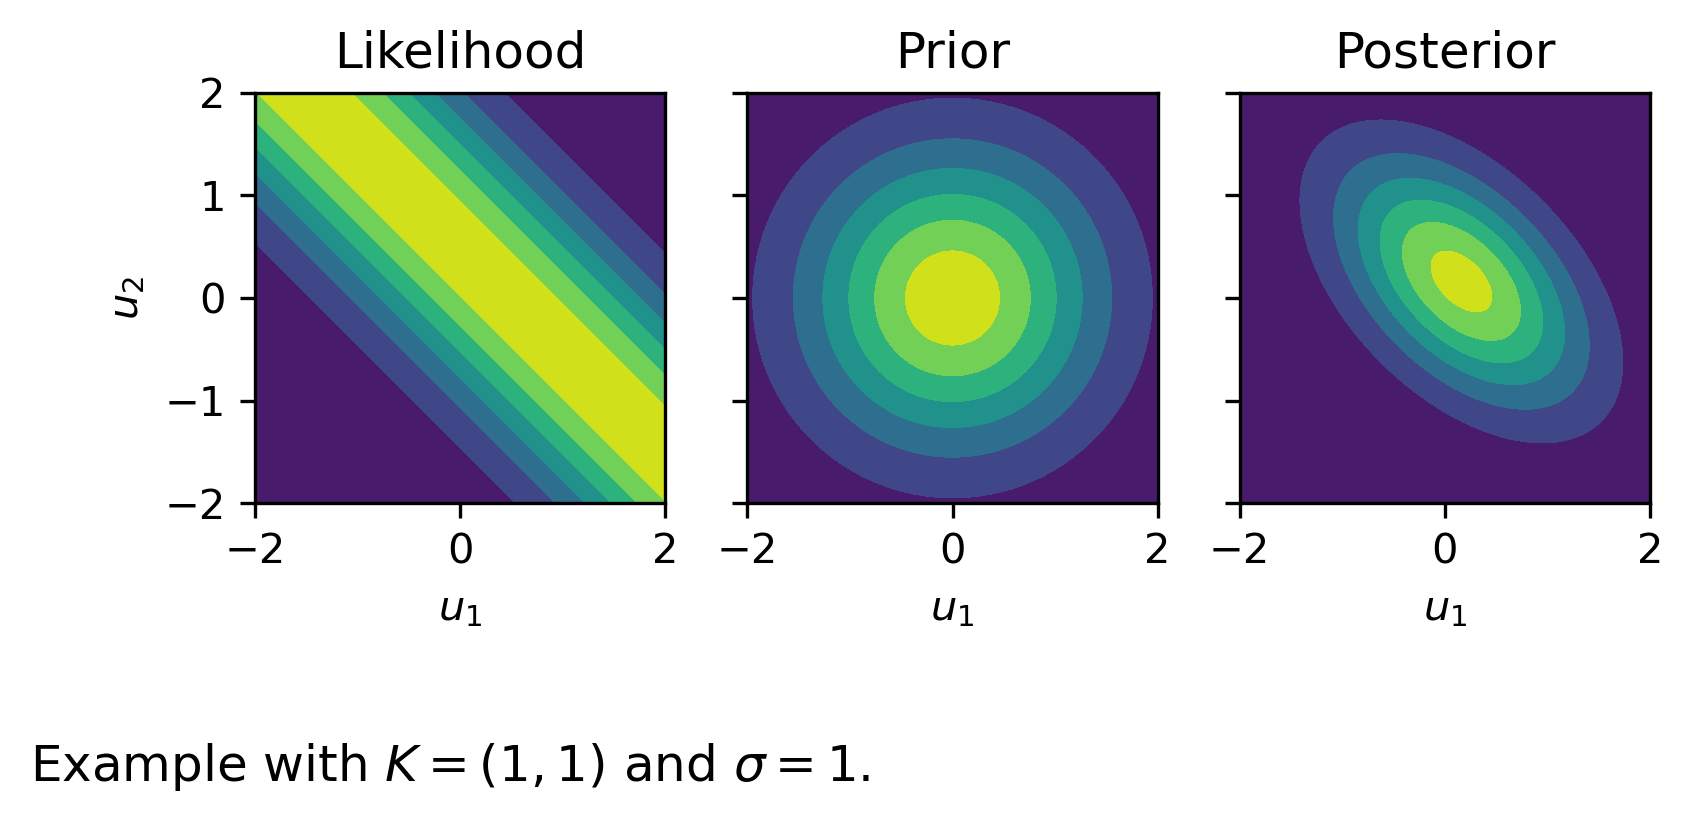

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# set random seed
np.random.seed(1)

# parameters
sigma = 1
mu = np.array([0,0])
Sigma = np.array([[1,0],[0,1]])
Sigma_inv = np.linalg.inv(Sigma)

# draw samples
u_true = np.random.multivariate_normal(mu,Sigma)
e = np.random.normal(0,sigma)
f_delta = u_true[0] + u_true[1] + e

# likelihood and prior
u1,u2 = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))

likelihood = np.exp(-0.5*(u1 + u2 - f_delta)**2/sigma**2)
prior = np.exp(-0.5*(u1 - mu[0])*(u1 - mu[0])*Sigma_inv[0,0])*np.exp(-(u1 - mu[0])*(u2 - mu[1])*Sigma_inv[0,1])*np.exp(-0.5*(u2 - mu[1])*(u2 - mu[1])*Sigma_inv[1,1])

# plot
fig,ax = plt.subplots(1,3,sharey=True)

ax[0].contourf(u1,u2,likelihood)
ax[0].set_xlabel(r'$u_1$')
ax[0].set_ylabel(r'$u_2$')
ax[0].set_aspect(1)
ax[0].set_title('Likelihood')

ax[1].contourf(u1,u2,prior)
ax[1].set_xlabel(r'$u_1$')
ax[1].set_aspect(1)
ax[1].set_title('Prior')

ax[2].contourf(u1,u2,likelihood*prior)
ax[2].set_xlabel(r'$u_1$')
ax[2].set_aspect(1)
ax[2].set_title('Posterior')

plt.figtext(0,0.1,r'Example with $K = (1,1)$ and $\sigma=1$.',{'fontsize':12})
plt.show()

### Laplace + uniform

If we assume Laplace noise with mean $\mu$ and parameter $\lambda$, and a uniform prior $u_i\in[a_i,b_i]$ we end up with

$$
\pi_{\text{post}}(u | f^\delta) = \exp\left(-\lambda^{-1}\|{K}u - f^{\delta} - \mu\|_1\right)\prod_i I_{[0,1]}\left(\frac{u_i-a_i}{b_i-a_i}\right),
$$

where $I[0,1]$ denotes the indicator function for the interval $[0,1]$. The corresponding MAP estimation problem is given by

$$
\min_{u\in B} \|{K}u - f^\delta - \mu\|_1,
$$

where $B = \{u \in \mathbb{R}^n \,|\, u_i \in [a_i,b_i]\,\, \text{for}\,\, i = 1,2,\ldots,n\}$. An example is shown below.

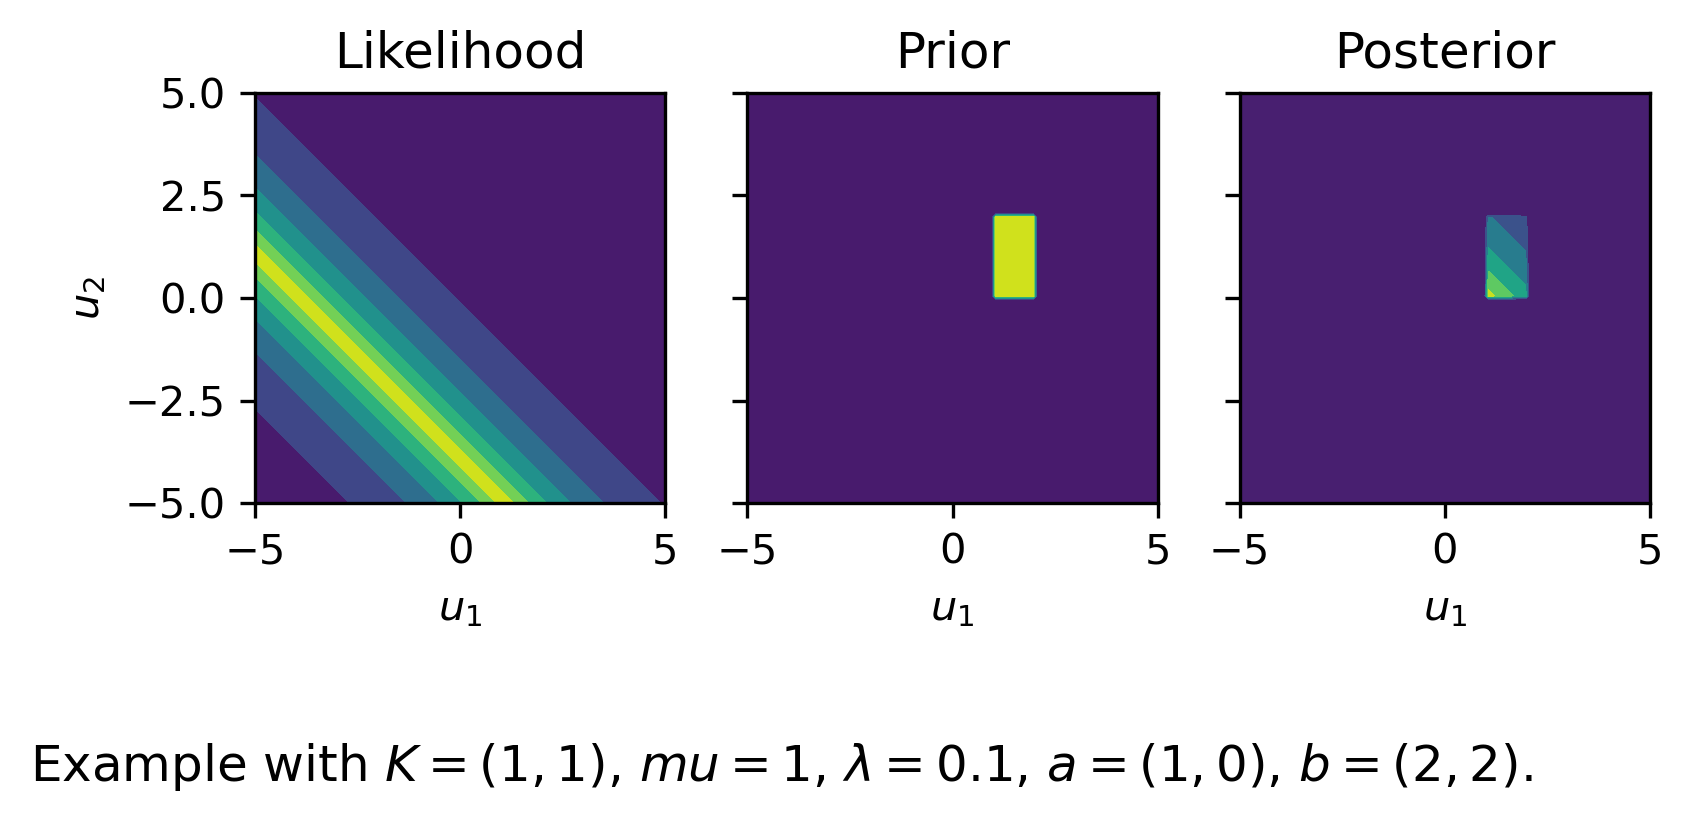

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# set random seed
np.random.seed(1)

# parameters
mu = 5
lmbda = 2
a = np.array([1,0])
b = np.array([2,2])

# draw samples
u_true = np.array([np.random.uniform(a[0],b[0]),np.random.uniform(a[1],b[1])])
e = np.random.laplace(mu,lmbda)
f_delta = u_true[0] + u_true[1] + e

# likelihood and prior
u1,u2 = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100))

likelihood = np.exp(-np.abs(u1 + u2 - f_delta - mu)/lmbda)
prior = (np.heaviside(u1-a[0],1)-np.heaviside(u1-b[0],1))*(np.heaviside(u2-a[1],1)-np.heaviside(u2-b[1],1))

# plot
fig,ax = plt.subplots(1,3,sharey=True)

ax[0].contourf(u1,u2,likelihood)
ax[0].set_xlabel(r'$u_1$')
ax[0].set_ylabel(r'$u_2$')
ax[0].set_aspect(1)
ax[0].set_title('Likelihood')

ax[1].contourf(u1,u2,prior)
ax[1].set_xlabel(r'$u_1$')
ax[1].set_aspect(1)
ax[1].set_title('Prior')

ax[2].contourf(u1,u2,likelihood*prior)
ax[2].set_xlabel(r'$u_1$')
ax[2].set_aspect(1)
ax[2].set_title('Posterior')

plt.figtext(0,0.1,r'Example with $K = (1,1)$, $mu=1$, $\lambda = 0.1$, $a = (1,0)$, $b=(2,2)$.',{'fontsize':12})
plt.show()

### Least-squares with positivity constraints

We let $f^\delta = Ku + \epsilon$, with $\epsilon$ normally distributed with zero mean and unit variance. In some cases it may not be natural to define prior information in terms of a probability density. For example, the prior information that $u_i \geq 0$ (all positive values are equally likely) does not have a corresponding probability density function associated with with. We may still add this prior in the Bayesian framework as

$$
\pi_{\text{prior}}(u) = \prod_i I_{[0,\infty)}(u_i).
$$

The corresponding variational problem is

$$
\min_{u \in \mathbb{R}_{\geq 0}^n} \|Ku - f^\delta\|_2^2.
$$

An example for a non-linear forward model is shown below.

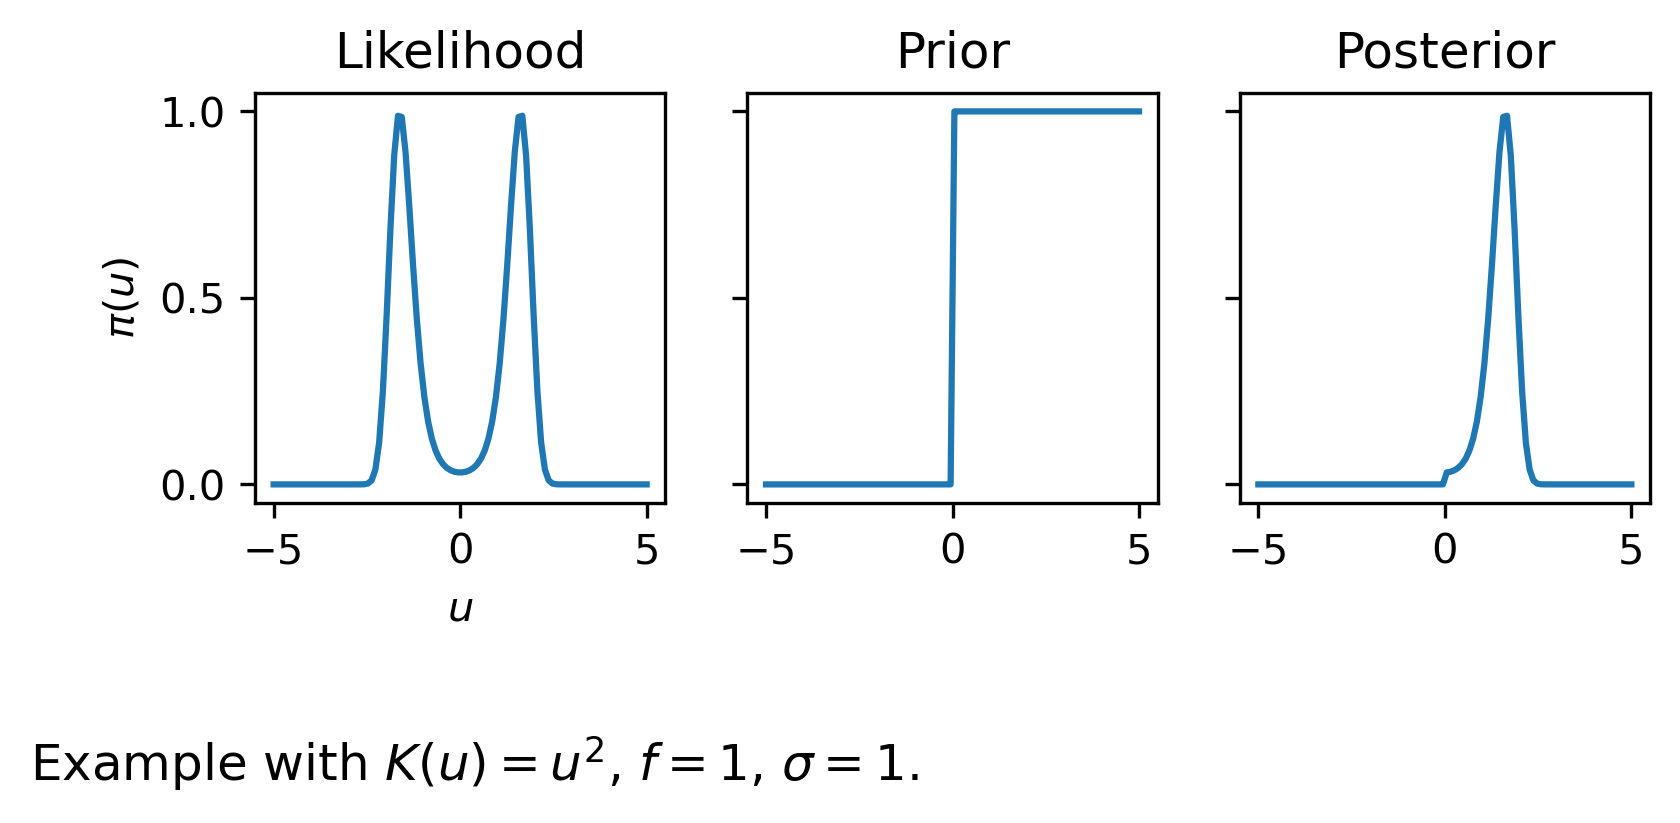

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# set random seed
np.random.seed(1)

# parameters
sigma = 1

# draw samples
f_delta = 1 + np.random.normal(0,sigma)

# likelihood and prior
u = np.linspace(-5,5,100)

likelihood = np.exp(-0.5*(u**2 - f_delta)**2/sigma**2)
prior = (u>0)

# plot
fig,ax = plt.subplots(1,3,sharey=True)

ax[0].plot(u,likelihood)
ax[0].set_xlabel(r'$u$')
ax[0].set_ylabel(r'$\pi(u)$')
ax[0].set_aspect(10)
ax[0].set_title('Likelihood')

ax[1].plot(u,prior)
ax[0].set_xlabel(r'$u$')
ax[1].set_aspect(10)
ax[1].set_title('Prior')

ax[2].plot(u,likelihood*prior)
ax[0].set_xlabel(r'$u$')
ax[2].set_aspect(10)
ax[2].set_title('Posterior')

plt.figtext(0,0.1,r'Example with $K(u) = u^2$, $f = 1$, $\sigma=1$.',{'fontsize':12})
plt.show()

### Poisson noise

We have seen that Poisson noise also plays an important role in many applications. In this case, we cannot model the noise as additive. Instead, we can view the observations $f_i^{\delta}$ as a stochastic variable having a Poisson distribution with parameter $\lambda_i = \left({K}u\right)_i$. This leads to

$$
\pi_{\text{data}}(u|f^{\delta}) = \prod_i \frac{ \left({K}u\right)_i^{f_i^\delta} }{f_i^\delta!}
\exp\left({-\left({K}u\right)_i}\right).
$$

The corresponding variational problem is

$$
\min_{u} \sum_{i=1}^m \left(\left({K}u\right)_i - f_i^{\delta}\ln\left({K}u\right)_i\right).
$$

An example of the corresponding posterior is shown below.

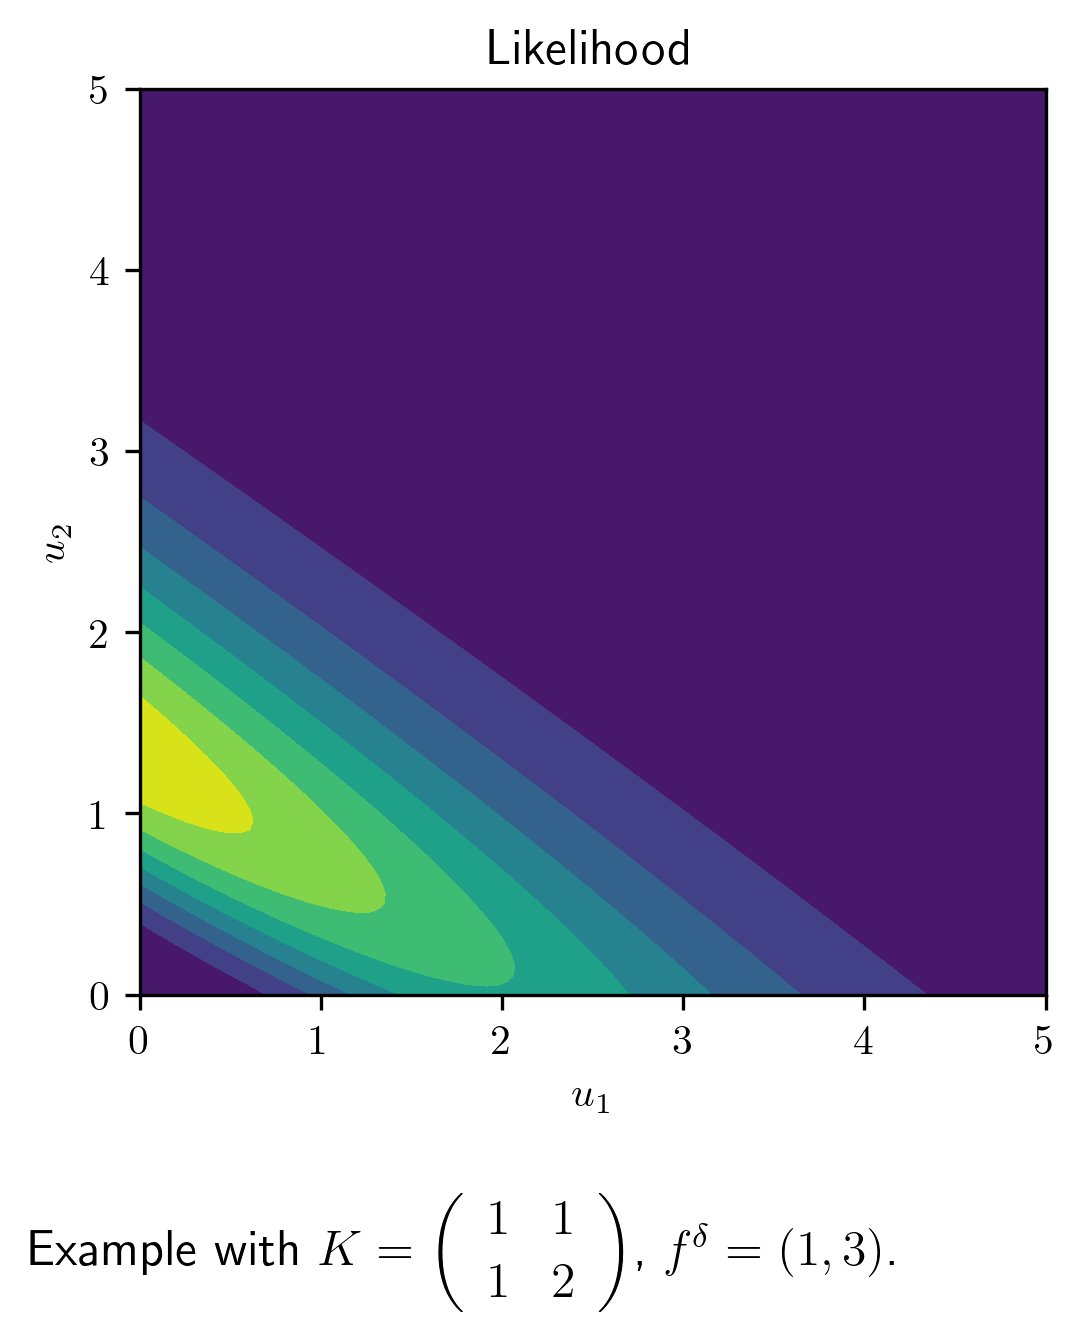

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# set random seed
np.random.seed(2)

# operator
u_true = np.array([1,1])
K = np.array([[1,1],[1,2]])

# draw sample
f = K.dot(u_true)
f_delta = np.random.poisson(K.dot(u_true))

# likelihood and prior
u1,u2 = np.meshgrid(np.linspace(0,5,100),np.linspace(0,5,100))

f1 = K[0,0]*u1 + K[0,1]*u2
f2 = K[1,0]*u1 + K[1,1]*u2
likelihood = ((f1**f_delta[0])*np.exp(-f1)/np.math.factorial(f_delta[0]))*((f2**f_delta[1])*np.exp(-f2)/np.math.factorial(f_delta[1]))

# plot
fig,ax = plt.subplots(1,1)

ax.contourf(u1,u2,likelihood)
ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')
ax.set_aspect(1)
ax.set_title('Likelihood')

plt.figtext(0.2,-0.1,r'Example with $K = \left(\begin{array}{cc} 1 & 1 \\ 1 & 2 \end{array}\right)$, $f^\delta = (1,3)$.',{'fontsize':12})
plt.show()

### Gaussian random fields

To include spatial correlations we can model $u$ as being normally distributed with mean $\mu$ and *covariance* $\Sigma_{\text{prior}}$. A popular choices is

$$
\Sigma_{\text{prior},ij} = \exp\left(-\frac{|i-j|^p}{pL^{p}}\right),
$$

where $L$ denotes the correlation length and $p$ is a parameter.

The corresponding variational form of the prior is

$$
-\log \pi_{\text{prior}}(u) = \|u\|_{\Sigma^{-1}_{\text{prior}}}^2.
$$

Examples of samples are shown below.

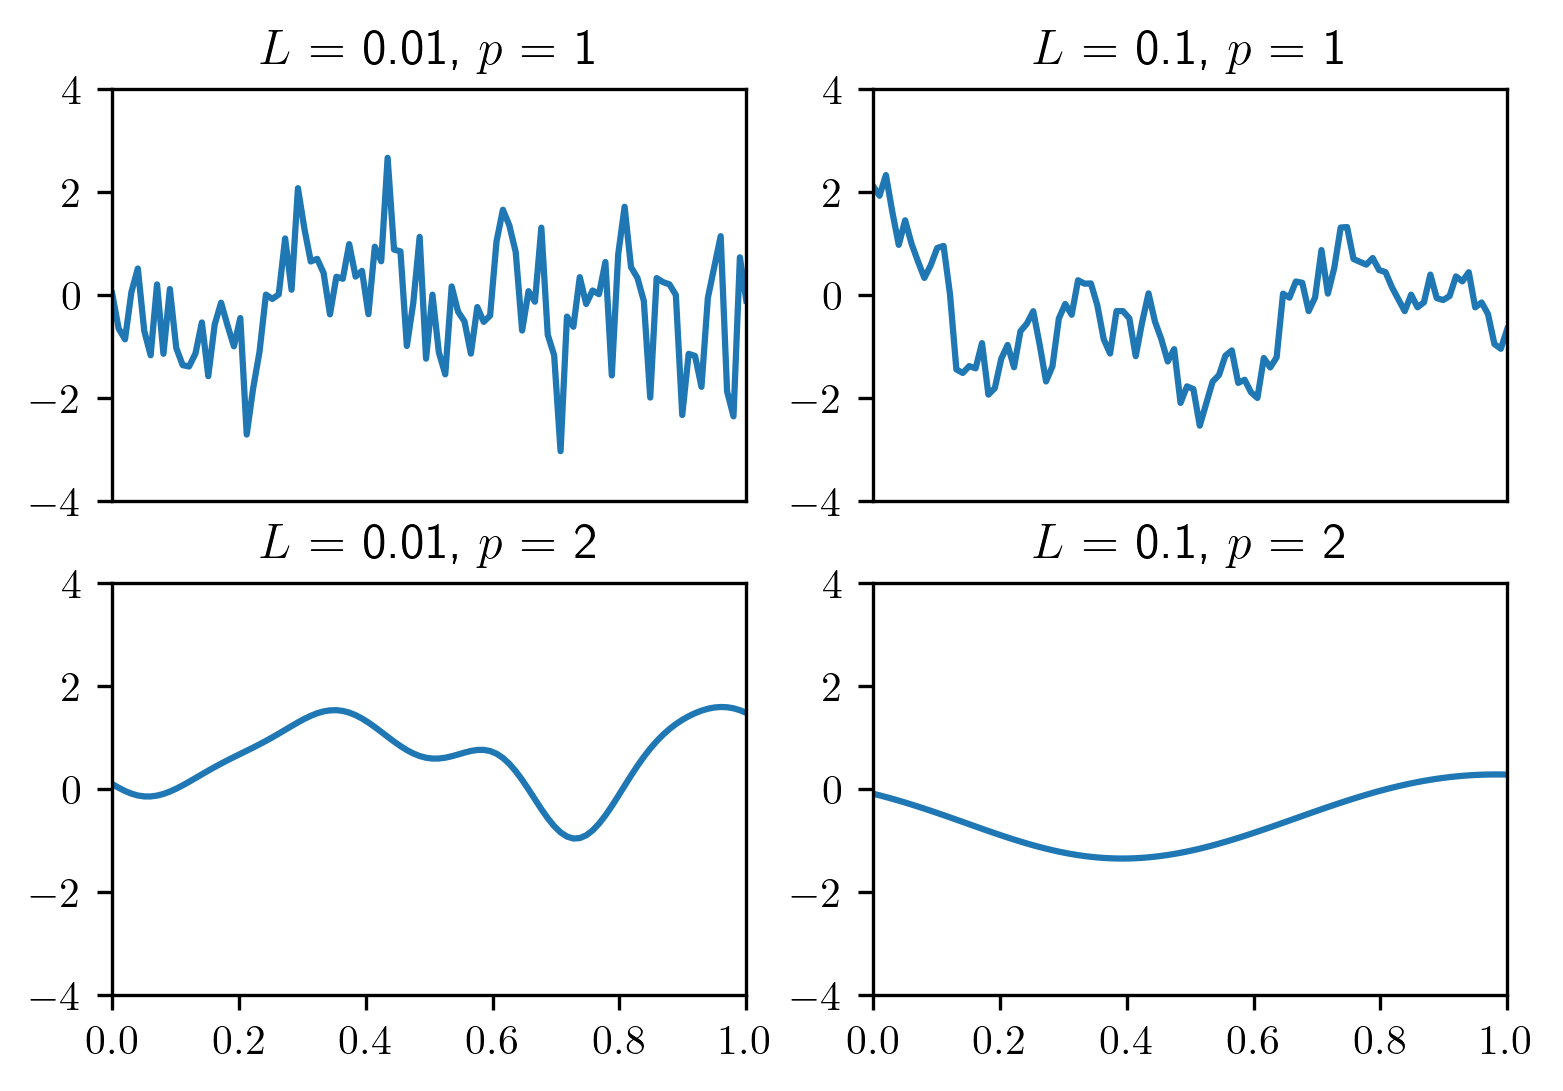

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

np.random.seed(2)

# grid
n = 100
x = np.linspace(0,1,n)
x1,x2 = np.meshgrid(x,x)

# mean and Covariance
mu = np.zeros(n)
Sigma = lambda L,p : np.exp(-np.abs(x1-x2)**p/(p*L))

# parameters
L = [.01,.1]
p = [1,2]

# plot
fig,ax = plt.subplots(2,2)

for i in range(2):
  for j in range(2):
    ax[i,j].plot(x,np.random.multivariate_normal(mu,Sigma(L[j],p[i])))
    title = '$L$ = '+str(L[j])+', $p$ = '+str(p[i])
    ax[i,j].set_title(title)
    ax[i,j].set_ylim([-4,4])
    ax[i,j].set_xlim([0,1])

ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
plt.show()

## Exercises

### Normal distribution


Consider a linear inverse problem

$$
Ku = f^{\delta},
$$

with $f^{\delta} = K\overline u + \epsilon$, where $\epsilon$ is drawn from a normal distributed with zero mean and covariance $\Sigma_{\text{noise}}$ and $\overline u$ is drawn from a normal distributed with mean $\mu_{\text{prior}}$ and covariance $\Sigma_{\text{prior}}$.

Show that the posterior distribution is Gaussian with mean

$$
\mu_{\text{post}} = \mu_{\text{prior}} + \left(K^*\Sigma_{\text{noise}}^{-1}K + \Sigma_{\text{prior}}^{-1}\right)^{-1}K^*\Sigma_{\text{noise}}^{-1}(f - K\mu_{\text{prior}}),
$$

and covariance

$$
\Sigma_{\text{post}} = \Sigma_{\text{prior}} - \Sigma_{\text{prior}}K^*\left(K\Sigma_{\text{prior}}K^* + \Sigma_{\text{noise}}\right)^{-1}K\Sigma_{\text{prior}}.
$$

Hint: The [Binomial inverse theorem](https://en.wikipedia.org/wiki/Woodbury_matrix_identity#Binomial_inverse_theorem) may come in handy.

```{admonition} Answer
:class: tip, toggle

The likelihood is a Gaussian with mean $Ku$ and covariance $\Sigma_{\text{noise}}$:

$$
\pi_{\text{likelihood}}(f^{\delta} | u) \propto \exp(-\textstyle{\frac{1}{2}}(Ku -
f^{\delta})^*\Sigma_{\text{noise}}^{-1}(Ku - f^\delta)).
$$

The prior is a Gaussian with mean $\mu_{\text{prior}}$ and covariance $\Sigma_{\text{prior}}$:

$$
\pi_{\text{prior}}(u) \propto \exp(-\textstyle{\frac{1}{2}}(u - \mu_{\text{prior}})^*\Sigma_{\text{prior}}^{-1}(u - \mu_{\text{prior}})).
$$

Forming the product gives

$$
\pi_{\text{post}}(u | f^{\delta}) \propto \exp(-\textstyle{\frac{1}{2}}(Ku - f^{\delta})^*\Sigma_{\text{noise}}^{-1}(Ku - f^\delta) -\textstyle{\frac{1}{2}}(u - \mu_{\text{prior}})^*\Sigma_{\text{prior}}^{-1}(u - \mu_{\text{prior}})).
$$

The goal is to write this as

$$
\pi_{\text{post}}(u | f^{\delta}) \propto \exp(-\textstyle{\frac{1}{2}}(u - \mu_{\text{post}})^*\Sigma_{\text{post}}^{-1}(u - \mu_{\text{post}})).
$$

Expanding terms in the exponential we get

$$
u^*(K^*\Sigma_{\text{noise}}^{-1}K + \Sigma_{\text{prior}}^{-1})u - 2u^*(K^*\Sigma_{\text{noise}}^{-1}f^\delta  + \Sigma_{\text{prior}}^{-1}\mu_{\text{prior}}) + \text{constants}.
$$

The goal is to rewrite this as

$$
u^*\Sigma_{\text{post}}^{-1}u - 2u^*\Sigma_{\text{post}}^{-1}\mu_{\text{post}} + \text{constants}.
$$

Hence:

$$
\Sigma_{\text{post}} = (K^*\Sigma_{\text{noise}}^{-1}K + \Sigma_{\text{prior}}^{-1})^{-1},
$$

and

$$
\mu_{\text{post}} = \Sigma_{\text{post}}(K^*\Sigma_{\text{noise}}^{-1}f^\delta  + \Sigma_{\text{prior}}^{-1}\mu_{\text{prior}}).
$$

Using the Binomial inverse theorem we find the desired expression for $\Sigma_{\text{post}}$. More algebraic manipulations yield the desired expression for $\mu_{\text{post}}$
```

### Poisson noise

Consider a linear inverse problem $Ku = f^{\delta}$, where we assume that $f^{\delta}$ follows a Poisson distribution with mean $\overline f = K\overline{u}$.

* Show that the MAP estimate may be obtained by solving the following minimization problem

$$
\min_u \sum_i \left(({K}u)_i - f_i^\delta\ln ({K}u)_i\right).
$$

* Assuming that both $\|f^{\delta} - \overline f\|_2$ and $\|u-\overline u\|_2$ are small, show that the log-likelihood function may be approximated as

$$
\sum_i \left(({K}u)_i - f_i^\delta\ln ({K}u)_i\right) \approx \|Ku - f^{\delta}\|_{\Sigma^{-1}}^2,
$$

where $\Sigma$ is a diagonal matrix with elements $1/\overline f_i$.

* In practice, we would replace $\overline f_i$ by $f_i^{\delta}$ for the covariance and thus approximate the Poisson map estimate as a weighted least-squares MAP estimate. Explain why this quadratic approximation makes sense heuristically.

```{admonition} Answer
:class: tip, toggle

The likelihood is a Poisson distrubution with parameter $Ku$:

$$
\pi_{\text{likelihood}}(f^{\delta} | u) \propto \prod_{i} \frac{(Ku)_i^{f^{\delta}_i} e^{-(Ku)_i}}{f^{\delta}_i!}.
$$

Note that we have implicltly assumed some indepence so that we can simply multiple univariate distrubutions with parameter $(Ku)_i$ to get the multivariate distribution. Taking the negative $\log$ and ignoring the constant term (that do not depend on $u$) we get the desired expression. The second and third questions are meant to show that in certain regimes, the Poisson distrubution is well-approximated by a Gaussian with mean and variance given by the Poisson parameter. Hence, for the purpose of MAP estimation we can replace the Poisson likelihood by a Gaussian, and hence minimization of a weighted least-squares problem. A derivation is given below.

Assuming $u$ is close to the ground truth, we consider a Taylor expansion of the $\ln$ term around $f^{\delta}$:

$$
\ln f_i \approx \ln f_i^\delta + \frac{(f_i - f^\delta)}{f^\delta} - \frac{(f_i - f_i^\delta)}{2(f_i^\delta)^2}.
$$

Plugging this in in gives the desired expression.
```

### MAP estimation

Consider the inverse problem

$$
Ku = f^{\delta},
$$

where

$$
Ku(x) = \int_0^1 u(x')e^{-d(x-x')^2} \mathrm{d}x',
$$

and

$$
f^{\delta} = K\overline{u} + \epsilon.
$$

Generate $\overline u \in \mathbb{R}^n$ as Gaussian random fields with mean zero and covariance

$$
\Sigma_{ij} = \exp\left(-\frac{|x_i-x_j|}{L}\right),
$$

and Gaussian noise, $\epsilon$, with zero mean and variance $\sigma$. An example is shown below.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

In [9]:
def getK(n):
    h = 1/n;
    d = 1e3;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = np.exp(-d*(xx-yy)**2)

    return K,x

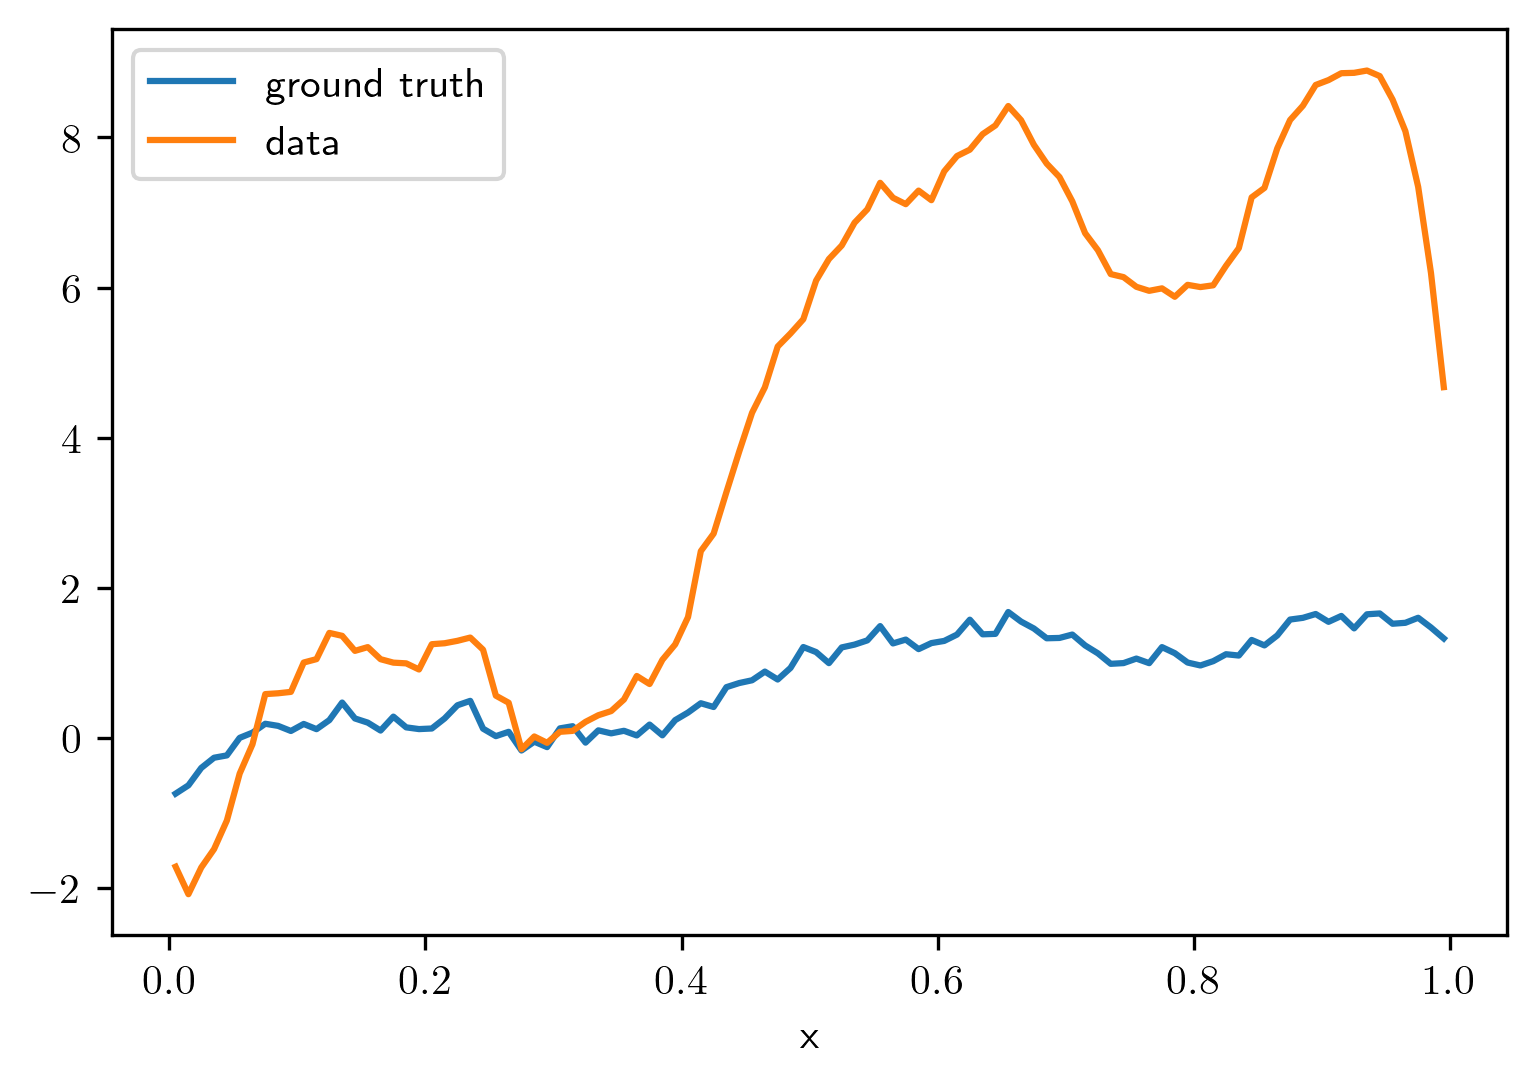

In [10]:
# parameters
n = 100
sigma = 1e-1
L = 1

# define forward operator
K,x = getK(n)

# define covariance matrix
Sigma = np.exp(-np.abs(np.outer(x,np.ones(n)) - np.outer(np.ones(n),x))/L)

# generate sample and data
u = np.random.multivariate_normal(np.zeros(n),Sigma)
noise = sigma*np.random.randn(n)
f = K@u + noise

# plot
plt.plot(x,u,label='ground truth')
plt.plot(x,f,label='data')
plt.xlabel('x')
plt.legend()
plt.show()

1. For varying correlation length $L$ and noise level $\sigma$, reconstruct the images using the regularized pseudo inverse of $K$.

2. Compute the MAP estimate from $\min_{u} \sigma^{-2}\|Ku - f^{\delta}\|_2^2 + \|u\|_{\Sigma^{-1}}^2$. Compare the reconstruction to the one obtained in 1.

3. What happens if you use two different covariance matrices for generating and reconstructing $u$?

````{admonition} Answer
:class: tip, toggle

To study the difference, we'll consider solving the inverse problem using generalized Tikhonov

$$\min_u \| Ku - f \|^2 + \alpha \| R^{-1/2}u \|_2^2,$$

and compute the average (over random noise instances) error for various $\alpha$. The hypothesis is that using $R = \Sigma$ and $\alpha = \sigma^2$ gives the best results.

We let $n = 100$, $L = 1$, $\sigma = 10^{-1}$ and compute the error for $100$ random instances of the noise.
In figure {numref}`expected_error` we show the expected reconstruction error for various values of $\alpha$ and $L$. We can conclude that

* Using the actual underlying covariance does indeed lead to better results.
* The optimal $\alpha$ when using the true covariance matrix is indeed given by $\sigma^2$
* For large $\alpha$ it does not really matter which covariance matrix is used to reglarize the problem
* For $\alpha = \sigma^2$ the error is slightly sensitive to $L$ with the smallest error being achieved at $L \approx 1$.

```{glue:figure} expected_error
:figwidth: 600px
:name: "expected_error"

Expected error as a function of $\alpha$.
```
````

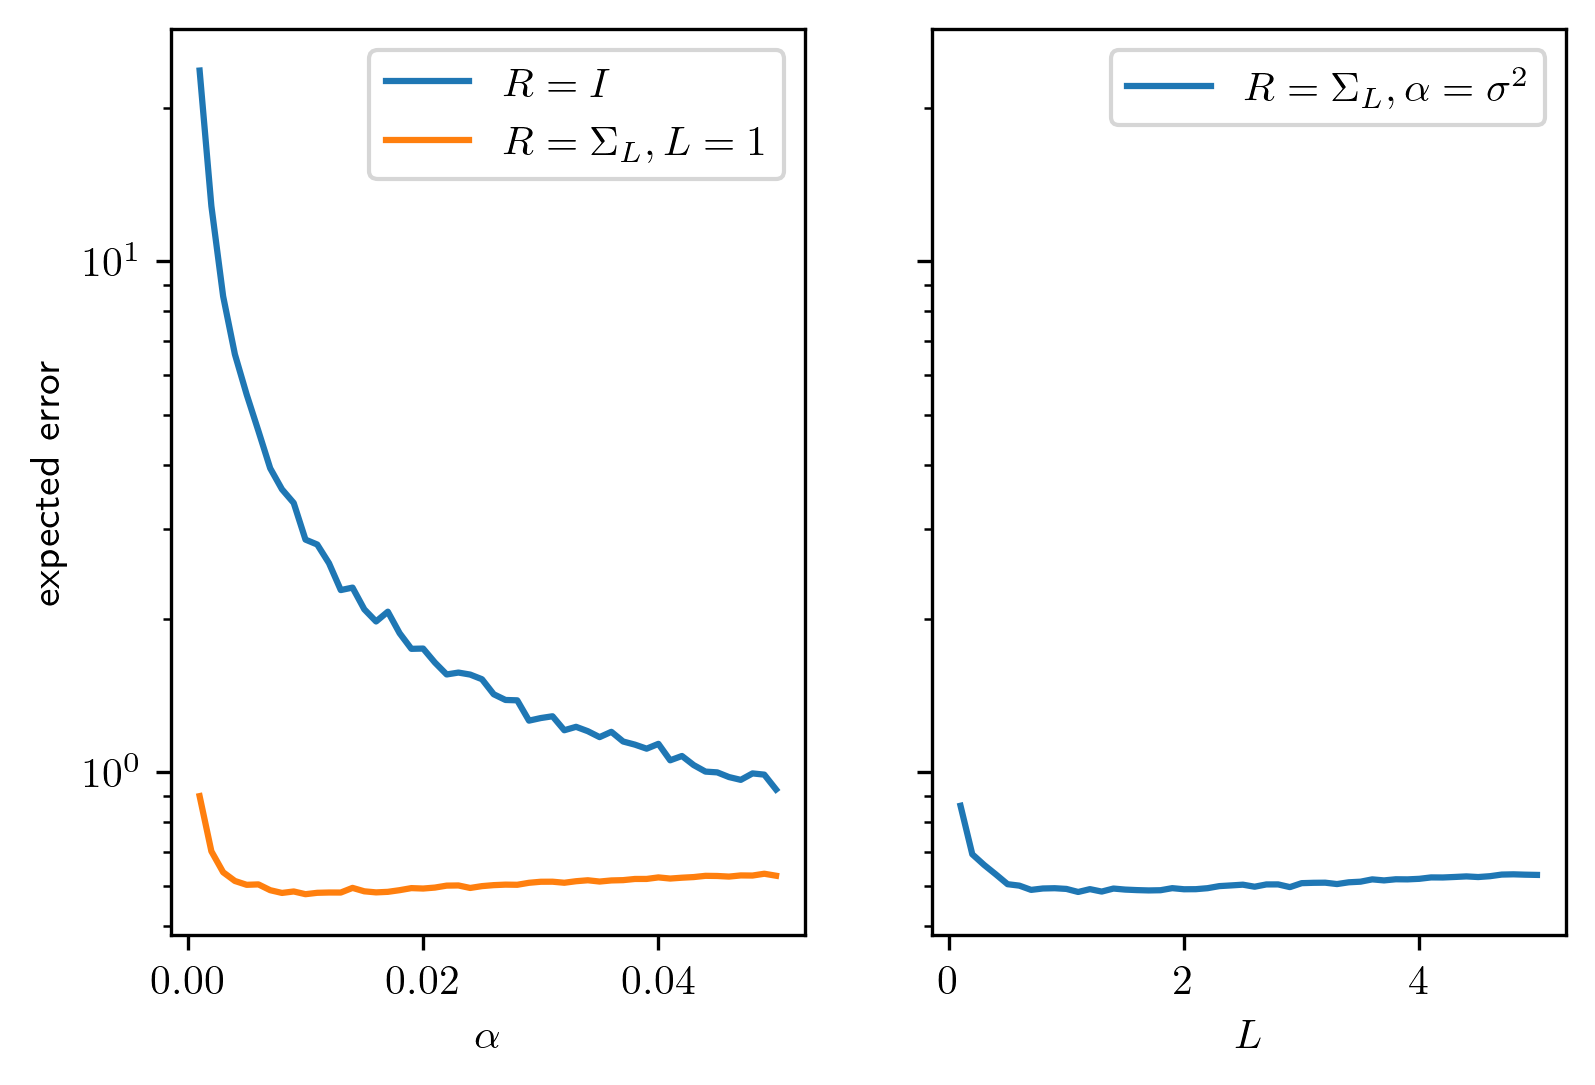

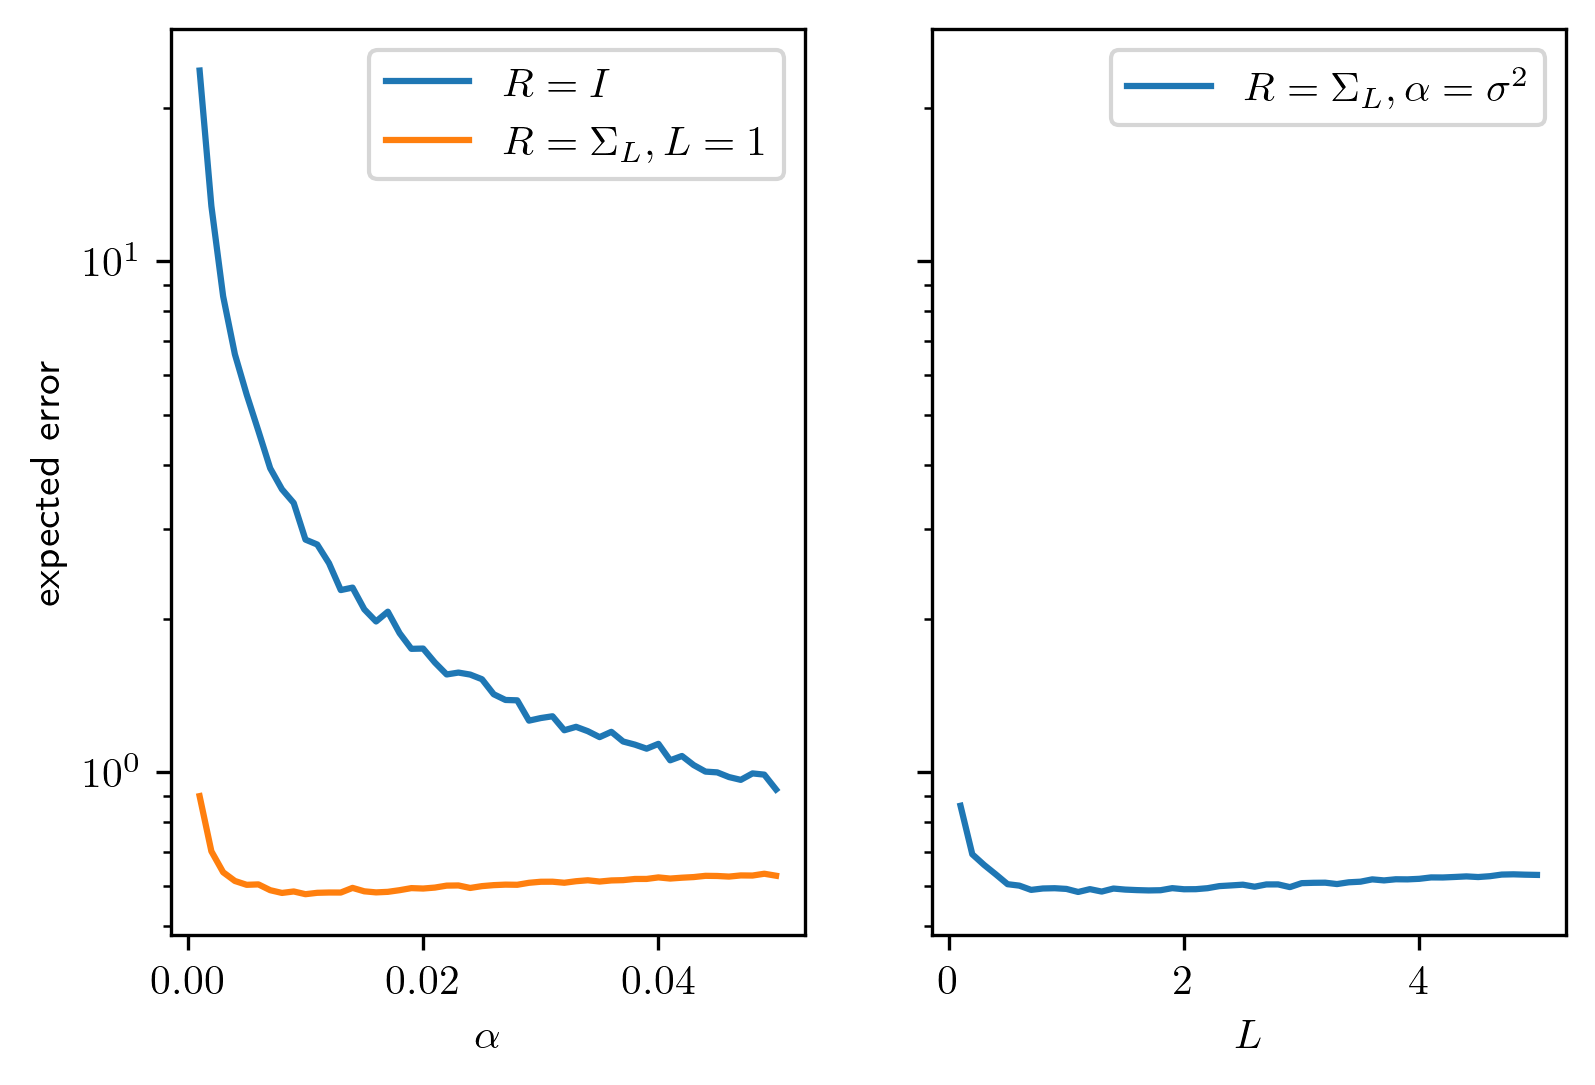

In [11]:
# forward operator
def getK(n):
    h = 1/n;
    d = 1e3;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = np.exp(-d*(xx-yy)**2)

    return K,x

# helper function
def recon(u,sigma,alpha,R,m):
    """
    Draw random noise with variance sigma_true
    and reconstruct using generalized Tikhonov with regularization min_u \|Ku - f\|^2 + alpha \|R^{-1/2}u\|_2^2
    """
    n = len(u)
    K,x = getK(n)

    urec = np.zeros((m,n))
    for k in range(m):
        noise = sigma*np.random.randn(n)
        f = K@u + noise
        urec[k] = np.linalg.solve(K.T@K + alpha*np.linalg.inv(R), K.T@f)

    error = np.mean(np.sum((urec - u)**2,axis=1))    
    return error,urec

# seed for reproducibility
np.random.seed(42)

# generate true image
n = 100
sigma = 1e-1
L = 1

K,x = getK(n)

Sigma = np.exp(-np.abs(np.outer(x,np.ones(n)) - np.outer(np.ones(n),x))/L)

u = np.random.multivariate_normal(np.zeros(n),Sigma)

# sampling settings
m = 100
alphas = np.linspace(1e-3,5e-2,50)

# Reconstruction using R = I
R = np.eye(n)
error1 = np.zeros(len(alphas))
for k in range(len(alphas)):
    error1[k],urec = recon(u,sigma,alphas[k],R,m)

# Reconstruction using R = Sigma
R = Sigma
error2 = np.zeros(len(alphas))
for k in range(len(alphas)):
    error2[k],urec = recon(u,sigma,alphas[k],R,m)

# Reconstruction as a function of L
Ls = np.linspace(.1,5,50)
alpha = sigma**2
error3 = np.zeros(len(Ls))
for k in range(len(Ls)):
    R = np.exp(-np.abs(np.outer(x,np.ones(n)) - np.outer(np.ones(n),x))/Ls[k])
    error3[k],urec = recon(u,sigma,alpha,R,m)

# Plot results
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].semilogy(alphas,error1,label='$R = I$')
ax[0].semilogy(alphas,error2,label=r'$R = \Sigma_L, L=1$')
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel('expected error')
ax[0].legend()

ax[1].semilogy(Ls,error3,label=r'$R = \Sigma_L, \alpha=\sigma^2$')
ax[1].set_xlabel(r'$L$')
ax[1].legend()

plt.show()
glue("expected_error",fig,display=False)

## References

```{bibliography} references.bib
:style: plain
:filter: docname in docnames
```